In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel("glass.xlsx", sheet_name = 'glass')

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [7]:
def remove_outliers(df):
    num_cols = df.select_dtypes(include= 'float64')
    for i in num_cols:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3-q1
        ul = q3+(IQR*1.5)
        ll = q1-(IQR*1.5)
        df=df[(df[i]>=ll) & (df[i]<=ul)]
    return df

out_data = remove_outliers(data)
out_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [8]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


##  2: Data Visualization:

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x1500 with 0 Axes>

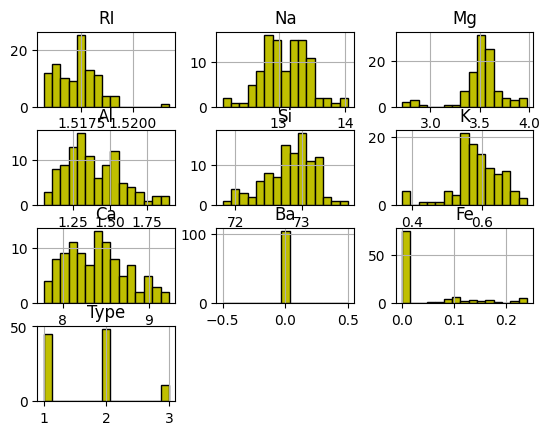

In [9]:
plt.figure(figsize = (15,15))
out_data.hist(bins = 15,color = 'y' , edgecolor = 'k')

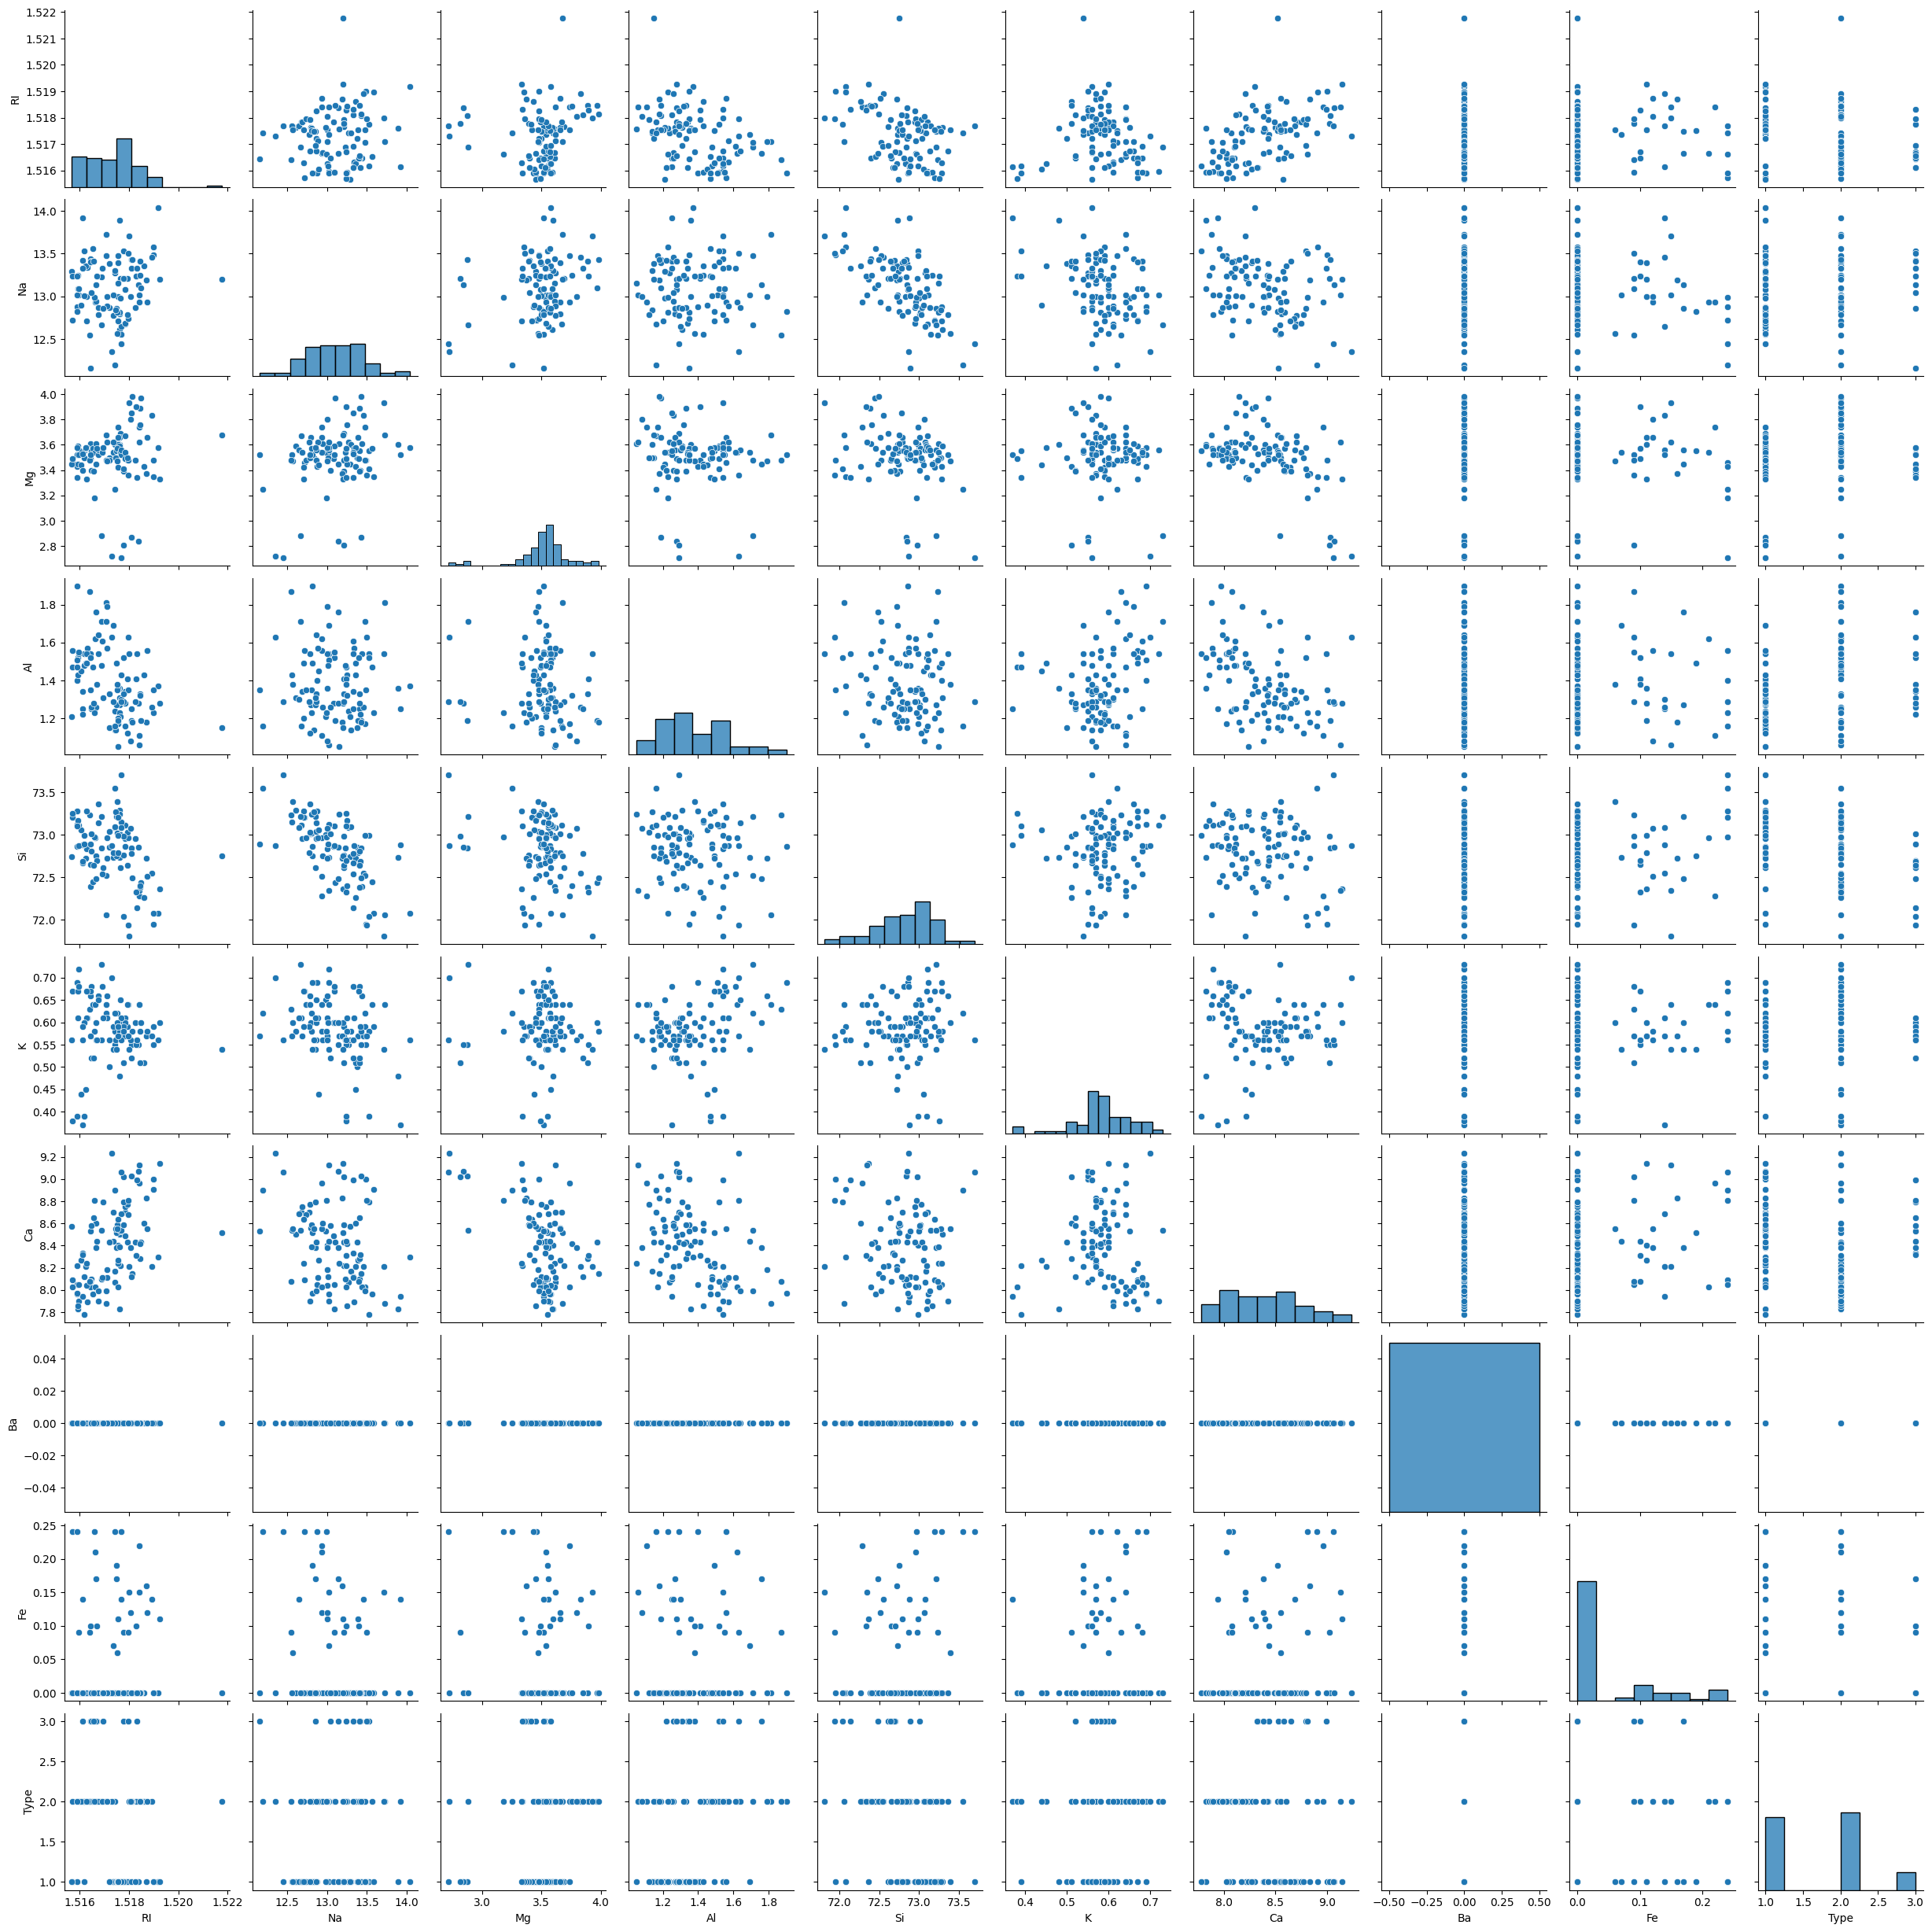

In [10]:
sns.pairplot(out_data)

In [11]:
out_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.112558,0.119473,-0.411694,-0.389915,-0.101900,0.527862,NaN,0.030877,-0.283903
Na,0.112558,1.000000,0.252616,-0.014180,-0.642772,-0.359758,-0.307472,NaN,-0.183155,0.131456
Mg,0.119473,0.252616,1.000000,-0.112102,-0.282293,-0.060664,-0.483946,NaN,-0.093993,0.080182
Al,-0.411694,-0.014180,-0.112102,1.000000,-0.124871,0.264455,-0.409398,NaN,-0.039480,0.341190
Si,-0.389915,-0.642772,-0.282293,-0.124871,1.000000,0.072888,-0.154089,NaN,0.071728,-0.320673
K,-0.101900,-0.359758,-0.060664,0.264455,0.072888,1.000000,-0.036310,NaN,0.052779,0.049001
Ca,0.527862,-0.307472,-0.483946,-0.409398,-0.154089,-0.036310,1.000000,NaN,0.180093,-0.134659
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.030877,-0.183155,-0.093993,-0.039480,0.071728,0.052779,0.180093,NaN,1.000000,-0.026387
Type,-0.283903,0.131456,0.080182,0.341190,-0.320673,0.049001,-0.134659,NaN,-0.026387,1.000000


<Axes: >

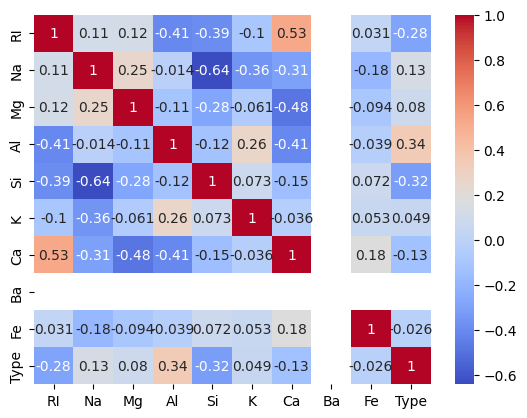

In [12]:
corr_matrix = out_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [13]:
out_data['Ba'].unique()

array([0.])

## 3. Data Preprocessing

In [14]:
#As there in no categorical column and removal ofoutliers is also done

In [15]:
out_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.0,1


In [16]:
x = out_data.iloc[:,:-1]
y = out_data.iloc[:,-1]

## 4: Random Forest Model Implementation

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [20]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2],
      dtype=int64)

<Axes: >

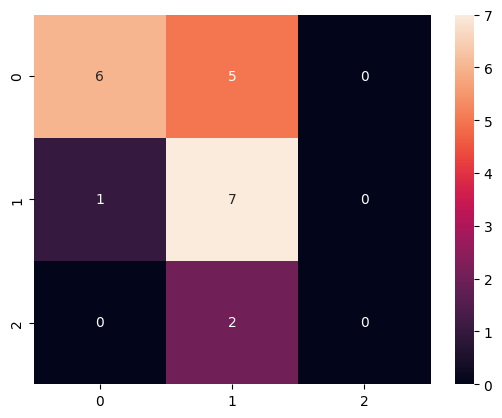

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score , f1_score

acc_score = accuracy_score(y_test,y_pred)
print('accuracy_score : ',acc_score)

prec_score = precision_score(y_test,y_pred , average = 'micro')
print('precision_score : ' , prec_score)

reca_score = recall_score(y_test,y_pred , average = 'micro')
print('recall_score', reca_score)

f_one_score = f1_score(y_test,y_pred , average = 'micro')
print('f1_score : ', f_one_score)

accuracy_score :  0.6190476190476191
precision_score :  0.6190476190476191
recall_score 0.6190476190476191
f1_score :  0.6190476190476191


## 5: Bagging and Boosting Methods

**Bagging Method**

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize BaggingClassifier with the correct parameter
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(x_train, y_train)

# Predict and calculate accuracy
y_pred = bagging_clf.predict(x_test)
print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')


Bagging Accuracy: 0.6666666666666666


**Boosting Method**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_clf.fit(x_train, y_train)

y_pred = bagging_clf.predict(x_test)

print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')

Bagging Accuracy: 0.6666666666666666


- the accuracy is 0.7142... it means the model trains with 71%

1. Explain Bagging and Boosting methods. How are they different from each other?

Bagging (Bootstrap Aggregating):
- Bagging is an ensemble method that improves model stability and accuracy by combining multiple versions of the same model trained on different random subsets of the dataset.
- How It Works:
  - Multiple subsets are drawn from the original training set with replacement (bootstrapping).
  - Each subset is used to train a separate model (often decision trees).
  - The predictions of these models are averaged (for regression) or voted on (for classification) to get the final prediction.
- Characteristics:
  - Helps reduce variance, making it effective for high-variance models like decision trees.
  - Models are trained independently, so bagging can be parallelized.
- Example Algorithm: Random Forest, which uses bagging with decision trees.

Boosting:
- Boosting is an ensemble technique that sequentially trains models, where each new model focuses on the errors made by the previous ones.
- How It Works:
  - The process begins with a model trained on the entire dataset.
  - In subsequent rounds, data points that were incorrectly predicted in earlier rounds are given more weight or attention.
  - Each model in the sequence tries to correct the errors of its predecessors, and the final prediction is a weighted sum of each model's predictions.
- Characteristics:
  - Reduces bias and variance, making it effective for both underfitting and overfitting problems.
  - Tends to be slower than bagging, as models are built sequentially.
- Example Algorithms: AdaBoost, Gradient Boosting, and XGBoost.

Key Differences:
- Purpose: Bagging focuses on reducing variance, while boosting reduces bias.
- Training Process: Bagging trains models independently in parallel, while boosting trains models sequentially in an adaptive way.
- Error Handling: Bagging uses random sampling, while boosting focuses more on examples that were misclassified or had high error in previous iterations.

 2. Explain how to handle imbalance in the data

Imbalanced datasets are common in classification problems, especially where one class significantly outnumbers others. Here are some methods to handle data imbalance:

- Resampling Techniques:
  - Oversampling: Increases the representation of the minority class by duplicating samples. One approach is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples based on existing data points.
  - Undersampling: Reduces the majority class by randomly removing samples. This can work well if the majority class is very large but risks losing information.
  
- Class Weight Adjustment:
  - Many machine learning algorithms (like logistic regression, decision trees, and SVM) allow specifying `class_weight` to penalize misclassifications of the minority class more heavily. This way, the model pays more attention to the minority class without altering the dataset itself.
  
- Anomaly Detection Models:
  - For extreme imbalances, framing the problem as anomaly detection might be useful. Models like isolation forests or one-class SVM can identify minority class samples as "anomalies" rather than traditional classifications.

- Ensemble Techniques:
  - Balanced Random Forests: Randomly undersamples the majority class at each bootstrap sampling phase in a Random Forest model, leading to more balanced trees.
  - Boosting Methods: Some boosting algorithms, like AdaBoost or Gradient Boosting, can assign higher weights to minority class instances, making them effective for imbalanced data handling.

- Evaluation Metrics for Imbalanced Data:
  - Use metrics like Precision, Recall, F1-Score, and ROC-AUC instead of accuracy. These metrics focus more on the minority class and provide a clearer picture of performance on imbalanced data.